 -*- coding: utf-8 -*-
"""
Created on Mon Feb 18 21:58:05 2019

@author: Ibitoye
"""

#This analysis aim to explore the data available @ https://ischool.syr.edu/classes/
 Some of the questions considered include -
 1. What percentage of courses are under-graduate.
 2. What under-graduate classes are on Friday. 
 3. What under-graduate classes start at 8am.
 4. 

 The above exploration aim to display the following skills
 a. read_html() for simple webscrapping 
 b. append() multiple dataFrames together
 c. ingesting data with multiple pages or sheet
 d. Feature Engineering (creating useful columns from existing ones to gather insight)

 ASSUMPTIONS
 - 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
website = 'https://ischool.syr.edu/classes/fall-2019/'

# This code only loads one page. I want to load all the pages for fall-2019 which is 5 in total.
myData = pd.read_html(website)
myData


[    Course Section  Class  Credits                              Title  \
 0   IDS401    M001  17179      3.0               What's the Big Idea?   
 1   IDS402    M001  17331      3.0                       Idea2Startup   
 2   IDS403    M001  17182      1.0                    Startup Sandbox   
 3   IDS460    M001  17349      3.0                       Peak to Peak   
 4   IDS460    M002  17361      3.0                   Innovate Ireland   
 5   IDS660    M001  17350      3.0                       Peak to Peak   
 6   IDS660    M002  17368      3.0                   Innovate Ireland   
 7   IST101    M003  17193      1.0                   First-Year Forum   
 8   IST101    M004  17194      1.0                   First-Year Forum   
 9   IST101    M005  17195      1.0                   First-Year Forum   
 10  IST101    M009  17197      1.0                   First-Year Forum   
 11  IST101    M002  17244      1.0                   First-Year Forum   
 12  IST101    M007  17245      1.0   

In [3]:
# To load all pages in fall-2019. Code below loads defined page statically. This is not very efficient.

website2 = 'https://ischool.syr.edu/classes/fall-2019/?page=1'
myData = pd.read_html(website2)
page1 = myData
page1

website2 = 'https://ischool.syr.edu/classes/fall-2019/?page=2'
myData = pd.read_html(website2)
page2 = myData
page2

[    Course Section  Class  Credits                               Title  \
 0   IST322    M001  20660      3.0       Dig Strat & Analytics for Web   
 1   IST323    M002  17187      3.0       Intro to Information Security   
 2   IST323    M004  17236      3.0       Intro to Information Security   
 3   IST323    M001  21416      3.0       Intro to Information Security   
 4   IST335    M001  17128      3.0      Intro/Info Based Organizations   
 5   IST335    M002  17129      3.0      Intro/Info Based Organizations   
 6   IST335    M003  17243      3.0      Intro/Info Based Organizations   
 7   IST335    M004  17335      3.0      Intro/Info Based Organizations   
 8   IST335    M005  17336      3.0      Intro/Info Based Organizations   
 9   IST335    M006  17374      3.0      Intro/Info Based Organizations   
 10  IST337    M001  17388      1.0              IM&T Support Practicum   
 11  IST343    M001  17384      3.0                     Data in Society   
 12  IST343    M002  2066

In [6]:
# To load all pages in fall-2019 in a more efficient way. Use append() to merge pages into one DataFrame

allPages = pd.DataFrame()
website3 = 'https://ischool.syr.edu/classes/fall-2019/?page=1'
myData3 = pd.read_html(website3)
allPages = allPages.append(myData3)
website3 = 'https://ischool.syr.edu/classes/fall-2019/?page=2'
myData3 = pd.read_html(website3)
allPages = allPages.append(myData3)
allPages

,Course,Section,Class,Credits,Title,Instructor(s),Time,Day,Room(s)
0,IDS401,M001,17179,3.0,What's the Big Idea?,Marcene S. Sonneborn,11:00am - 12:20pm,TuTh,Hall of Languages 202
1,IDS402,M001,17331,3.0,Idea2Startup,John DuRoss Liddy,9:30am - 12:15pm,F,Hinds Hall 011
2,IDS403,M001,17182,1.0,Startup Sandbox,John DuRoss Liddy,1:00pm - 4:00pm,F,Syracuse Technology Garden
3,IDS460,M001,17349,3.0,Peak to Peak,John DuRoss Liddy,8:00pm - 9:30pm,M,Online
4,IDS460,M002,17361,3.0,Innovate Ireland,John DuRoss Liddy,8:00pm - 9:30pm,M,Hinds Hall 120
5,IDS660,M001,17350,3.0,Peak to Peak,John DuRoss Liddy,12:00am - 12:00am,NaN,Online
6,IDS660,M002,17368,3.0,Innovate Ireland,John DuRoss Liddy,12:00am - 12:00am,NaN,Online
7,IST101,M003,17193,1.0,First-Year Forum,Shannon Marrero,2:00pm - 2:55pm,Th,Hinds Hall 120
8,IST101,M004,17194,1.0,First-Year Forum,Stephanie Worden,12:30pm - 1:25pm,Tu,Hinds Hall 120
9,IST101,M005,17195,1.0,First-Year Forum,Christopher Perrello,12:30pm - 1:25pm,Th,Hinds Hall 120


In [7]:
# To load all pages in fall-2019 EVEN more efficiently, re-write code above to loop through all 5 pages.

allPages_loop = pd.DataFrame()
for num in range(1,6):
    website4 = 'https://ischool.syr.edu/classes/fall-2019/?page='+str(num)
    myData4 = pd.read_html(website4)
    allPages_loop = allPages_loop.append(myData4)
allPages_loop

# To make code above re-useable, wrapping it in a function helps as seen below.]

def getAll_fromWebsite():
    allPages_loop = pd.DataFrame()
    for num in range(1,6):
        website4 = 'https://ischool.syr.edu/classes/fall-2019/?page='+str(num)
        myData4 = pd.read_html(website4)
        allPages_loop = allPages_loop.append(myData4)
    return allPages_loop

allPages_loop = getAll_fromWebsite()
allPages_loop.sample(12)    

,Course,Section,Class,Credits,Title,Instructor(s),Time,Day,Room(s)
16,IST687,M004,17233,3.0,LAB: Introduction to Data Science,Erik Scott Anderson,3:30pm - 4:50pm,Th,Hinds Hall 018
24,IST707,M003,17391,3.0,Data Analytics,Stephen Wallace,9:30am - 12:15pm,Tu,Hinds Hall 027
2,IST999,M001,17135,1.0,Dissertation,NaN,12:00am - 12:00am,NaN,NaN
45,IST654,M002,17204,3.0,Information Systems Analysis,James Stewart,5:15pm - 8:00pm,M,Sims Hall 331
25,IST618,M001,21915,3.0,Information Policy,NaN,12:45pm - 3:35pm,M,Hinds Hall 111
11,IST678,M003,17413,3.0,Comm for Info Professionals,Denis Samburskiy,3:30pm - 4:50pm,TuTh,Hinds Hall 121
45,IST971,M800,21188,1.0,Internship in Info Studies,Susan Monica Bonzi,12:00am - 12:00am,NaN,NaN
22,IST707,M001,17389,3.0,Data Analytics,Frank Jr Marullo,5:00pm - 7:50pm,Th,Hinds Hall 013
0,IST322,M001,20660,3.0,Dig Strat & Analytics for Web,Michael Clarke,3:30pm - 4:50pm,TuTh,Hinds Hall 027
30,IST621,M001,17273,3.0,Info Management and Technology,Ingrid Erickson,9:30am - 12:15pm,W,Hinds Hall 011


### The function above makes data ingestion and exploration more efficient 
    # 1. for example, get random sample of data set
    # 2. get Classes with credit equal to 1
    # 3. get list of Instructor(s) 
    # 4. percentage of clasess with credit greater than 1
    # 5. heatmap showing concentration of classes per hour of day
    # 6. predict Room for Class based on course. 
    # 7. to achieve 6 above, find correlation between room and class

In [8]:
 #1  - random sample of data set.

sample_data = getAll_fromWebsite()
rand_samp = sample_data.sample(12)  
rand_samp  

,Course,Section,Class,Credits,Title,Instructor(s),Time,Day,Room(s)
26,IST618,M004,21918,3.0,Information Policy,NaN,9:30am - 12:15pm,F,Hinds Hall 018
36,IST726,M800,17155,3.0,Enterprise Architecture,Scott A Bernard,12:00am - 12:00am,NaN,Online
30,IST233,M002,17166,3.0,LAB: Intro to Computer Networking,David J Molta,9:30am - 10:25am,F,Hinds Hall 027
5,IDS660,M001,17350,3.0,Peak to Peak,John DuRoss Liddy,12:00am - 12:00am,NaN,Online
48,IST421,M001,17383,3.0,Information Visualization,Jeff Hemsley,9:30am - 12:15pm,Tu,Hinds Hall 010
38,IST776,M001,20789,3.0,Research Methods in IST,Lu Xiao,9:30am - 12:15pm,M,Hinds Hall 120
41,IST256,M005,17261,3.0,Appl.Prog.For Information Syst,Deborah L Nosky,3:45pm - 5:05pm,W,Hinds Hall 018
3,IST659,M006,17415,3.0,Data Admin Concepts & Db Mgmt,Yun Huang,9:30am - 12:15pm,M,Hinds Hall 027
46,IST655,M001,20725,3.0,Enterprise IT Consultation,Michelle L. Kaarst-Brown,2:00pm - 4:45pm,Tu,Hinds Hall 111
29,IST718,M003,17341,3.0,Big Data Analytics,Daniel E. Acuna,9:30am - 12:15pm,Tu,Hinds Hall 011


In [9]:
 #2  - get Classes with credit equal to 1.
 # further analysis could include - how many take place on friday, how many take place in Hinds Hall 120 etc
credit_is1 = getAll_fromWebsite()
credit_one = credit_is1[credit_is1['Credits']==1]
credit_one

,Course,Section,Class,Credits,Title,Instructor(s),Time,Day,Room(s)
2,IDS403,M001,17182,1.0,Startup Sandbox,John DuRoss Liddy,1:00pm - 4:00pm,F,Syracuse Technology Garden
7,IST101,M003,17193,1.0,First-Year Forum,Shannon Marrero,2:00pm - 2:55pm,Th,Hinds Hall 120
8,IST101,M004,17194,1.0,First-Year Forum,Stephanie Worden,12:30pm - 1:25pm,Tu,Hinds Hall 120
9,IST101,M005,17195,1.0,First-Year Forum,Christopher Perrello,12:30pm - 1:25pm,Th,Hinds Hall 120
10,IST101,M009,17197,1.0,First-Year Forum,Jeff Rubin,3:30pm - 4:25pm,Tu,Hinds Hall 120
11,IST101,M002,17244,1.0,First-Year Forum,Deborah L Nosky,2:15pm - 3:10pm,M,Hinds Hall 120
12,IST101,M007,17245,1.0,First-Year Forum,NaN,2:00pm - 2:55pm,Tu,Hinds Hall 120
13,IST101,M006,17253,1.0,First-Year Forum,Julie Walas,5:15pm - 6:10pm,Th,Hinds Hall 120
14,IST101,M010,17254,1.0,First-Year Forum,Lora Carlson,12:45pm - 1:40pm,W,Hinds Hall 120
10,IST337,M001,17388,1.0,IM&T Support Practicum,Jeffrey Fouts,2:15pm - 3:35pm,F,Hinds Hall 117


In [15]:
 #3  - get list of Instructor(s).
 
instructors_list = getAll_fromWebsite()
teacher = instructors_list['Instructor(s)'].unique()
name_ofTeachers = str(teacher)
name_ofTeachers

"['Marcene S. Sonneborn' 'John DuRoss Liddy' 'Shannon Marrero'\n 'Stephanie Worden' 'Christopher Perrello' 'Jeff Rubin' 'Deborah L Nosky'\n nan 'Julie Walas' 'Lora Carlson' 'A Randall Wenner' 'David J Molta'\n 'Jeffrey T Girard' 'S Bruce Boardman' 'Michael Fudge' 'Avinash Kadaji'\n 'Wade Stringer' 'Laurie A Ferger' 'Nick Lyga' 'Christian A Kirkegaard'\n 'Gary Friedman' 'Michael Clarke' 'Christopher Croad' 'Timothy J Van Waes'\n 'James Enwright' 'Alexander Corsello' 'Jeffrey Fouts'\n 'JoAnne Wallingford' 'Blythe Scherrer' 'Jennifer Stromer-Galley'\n 'Bryan Semaan' 'Peggy M Takach' 'Bruce Kingma' 'Eric William Young'\n 'Daniel Cohen' 'Robert E Campagna' 'Mark Andrew Borte'\n 'Timothy A Jorgensen' 'Ryan Elstad' 'Lauren J Hardee-Chase'\n 'P Douglas Taber' 'Chad Aaron Harper' 'Jonathan Backus' 'Jeffrey Saltz'\n 'Jeffrey M. Stanton' 'Stephen Wallace' 'Carl J Schramm'\n 'Phil Evangelista' 'Radhika Garg' 'Ian P MacInnes' 'Jeff Hemsley'\n 'Ann M Perkins' 'Michelle L. Kaarst-Brown' 'Garland McCo

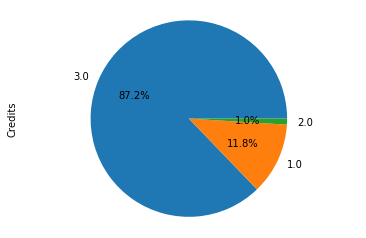

In [16]:
 #4  - get percentage of clasess with credit greater than 1.
perct = getAll_fromWebsite()
count_credits = perct['Credits'].value_counts()
count_credits

count_credits.plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')
plt.show()

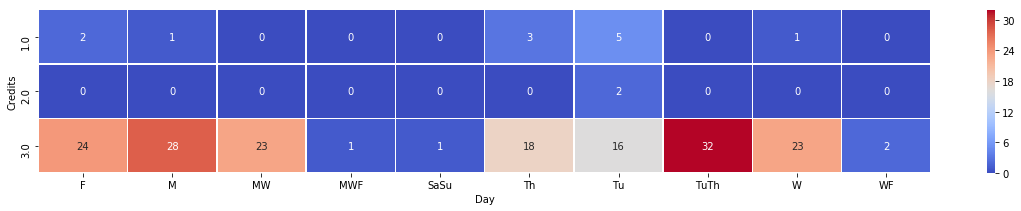

In [23]:
# get week day with most course credit load
byDate = pd.crosstab(perct['Credits'],perct['Day'])
byDate
plt.figure(figsize= (20,3))
sb.heatmap(byDate, cmap='coolwarm', annot=True, linewidth=.5)

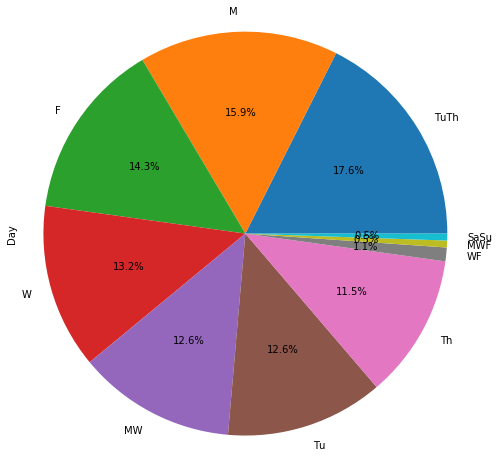

In [59]:
# get percentage of clases per day
perct = getAll_fromWebsite()
count_credits = perct['Day'].value_counts()
count_credits
plt.figure(figsize= (8,8))
count_credits.plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## future work include predicting what course it is or what day a known course is likely to be

## predicting how many credit a course is likely to be